In [987]:
#setup
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [989]:
#import Keras for Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [991]:
# Download and prepare the data
data = pd.read_csv('data.csv', delimiter=';')
drop_out_df = pd.DataFrame(data)
drop_out_df.sample(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
2234,1,17,2,9254,1,1,118.0,1,19,19,...,0,6,9,4,12.0,0,15.5,2.8,-4.06,Enrolled
3647,1,17,1,9238,1,1,135.0,1,37,37,...,0,6,0,0,0.0,0,16.2,0.3,-0.92,Dropout
516,2,39,1,9003,1,1,120.0,1,37,19,...,0,6,15,5,12.4,0,8.9,1.4,3.51,Graduate
4172,1,43,2,9147,1,1,131.0,1,19,37,...,0,5,10,1,14.0,0,7.6,2.6,0.32,Enrolled
1147,1,51,1,9991,0,1,141.0,1,19,38,...,1,5,5,5,11.4,0,8.9,1.4,3.51,Graduate


In [992]:
drop_out_df['Target'] = drop_out_df['Target'].map({
    'Graduate': 0,  # Keep category 0 as 0
    'Enrolled': 0,  # Group category 1 with 0
    'Dropout': 1   # Keep category 2 as a separate class (or merge with another class if needed)
})
drop_out_df.sample(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1063,1,1,1,9500,1,1,149.0,1,19,1,...,0,8,8,8,14.445000,0,9.4,-0.8,-3.12,0
1690,1,7,1,9119,1,1,140.8,1,34,34,...,0,5,0,0,0.000000,0,7.6,2.6,0.32,1
2383,1,53,1,9003,1,1,130.0,1,19,1,...,5,12,15,9,11.444444,0,8.9,1.4,3.51,0
3346,1,39,1,9500,1,1,120.0,1,37,37,...,0,7,7,0,0.000000,0,13.9,-0.3,0.79,1
1347,1,1,3,9500,1,1,128.0,1,1,1,...,0,7,7,7,12.500000,0,12.4,0.5,1.79,0


In [995]:
X = drop_out_df.iloc[:, :-1].values
y = drop_out_df['Target'].values

### Balancing the data using SMOTE, 

In [998]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [1000]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11111)

In [1002]:
np.mean(y), np.mean(1-y) #shows that 67.8% did not drop out, so we can achieve an accuracy of 67.8% without any model

(0.5, 0.5)

### Feature Scaling

In [1005]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Selection and Training

In [1065]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Prediction and Model Evaluation

In [1068]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[564  42]
 [ 81 515]]


0.8976705490848585

Precision: 0.9245960502692998
Recall: 0.8640939597315436
F1 Score: 0.8933217692974849


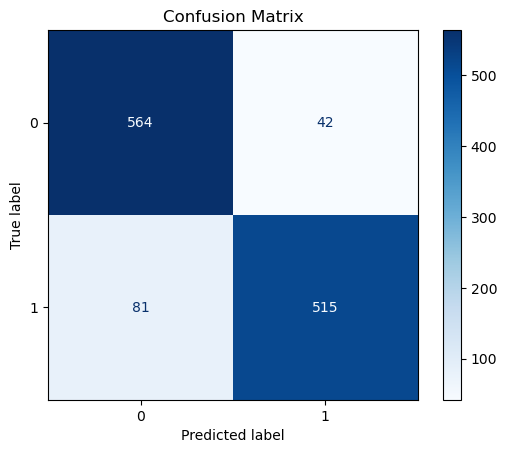

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       606
           1       0.92      0.86      0.89       596

    accuracy                           0.90      1202
   macro avg       0.90      0.90      0.90      1202
weighted avg       0.90      0.90      0.90      1202



In [1070]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print('Classification Report:')
print(classification_report(y_test, y_pred))

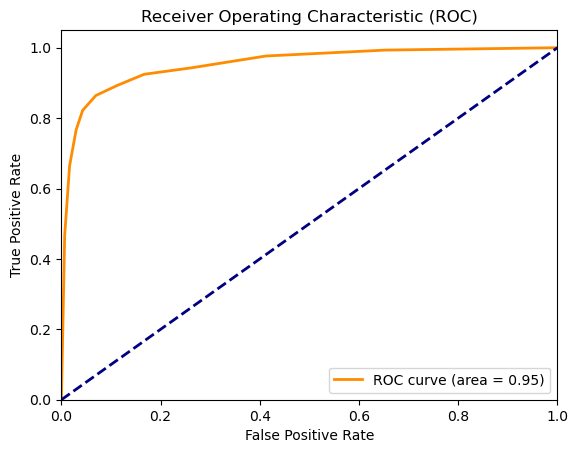

In [1072]:
# Get predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Hyper-parameter Tuning

In [1075]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

print("Best Parameters after further tuning:", grid_search.best_params_)
print("Best Score after further tuning:", grid_search.best_score_)


RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)
Best Parameters after further tuning: {'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 150}
Best Score after further tuning: 0.8694853451266044


In [1037]:
# Training the model with the best parameters
best_model = LogisticRegression(C=10, max_iter=100, penalty='l2', solver='lbfgs', random_state=42)
best_model.fit(X_train, y_train)

test_accuracy = best_model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.8552412645590682


In [1039]:
y_pred = best_model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Precision: 0.874113475177305
Recall: 0.8271812080536913
F1 Score: 0.85
Confusion Matrix:
[[535  71]
 [103 493]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       606
           1       0.87      0.83      0.85       596

    accuracy                           0.86      1202
   macro avg       0.86      0.86      0.86      1202
weighted avg       0.86      0.86      0.86      1202



### Feature importance analysis

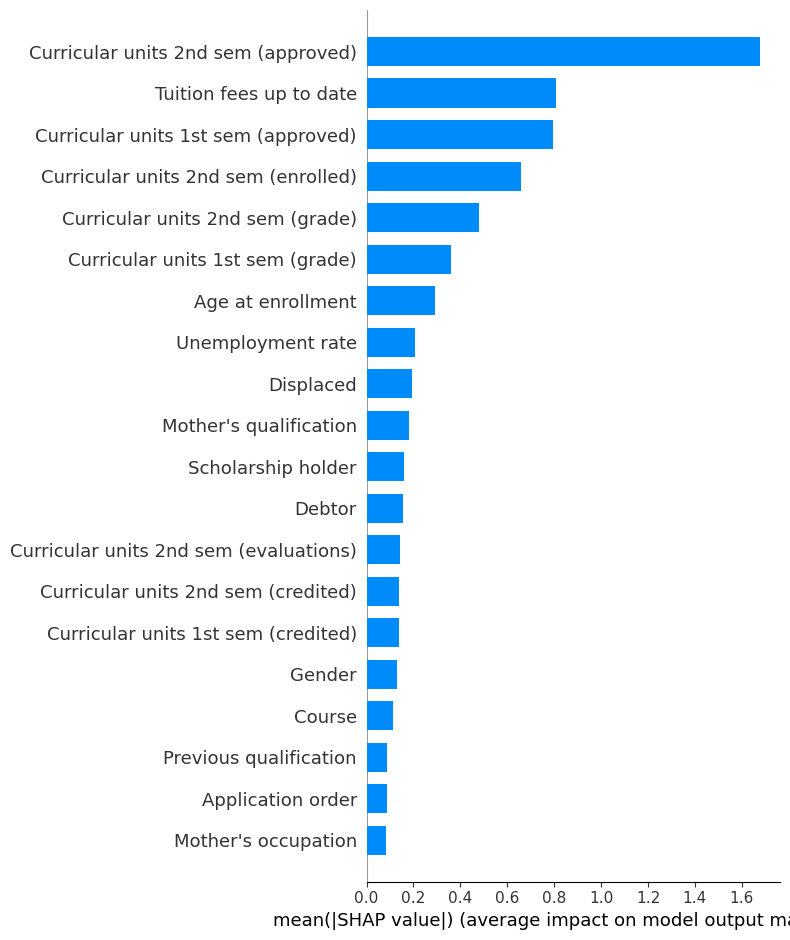

In [943]:
import shap
masker = shap.maskers.Independent(data = X_test)
model = LogisticRegression(random_state = 1)
model.fit(X_train, y_train)
explainer = shap.LinearExplainer(model, masker=masker)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, features=X, feature_names=drop_out_df.columns, plot_type='bar')

In [1043]:
model_1 = Sequential()
model_1.add(Dense(12, input_shape = (36,), activation = 'sigmoid'))
model_1.add(Dense(1, activation = 'sigmoid'))   

In [1045]:
model_1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 12)             │           444 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457 (1.79 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

In [1047]:
model_1.compile(SGD(), 'binary_crossentropy', metrics=['accuracy'])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 3539
'y' sizes: 4804


In [907]:
# Get the predicted probabilities
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

# Convert predicted probabilities to class labels
# Assuming binary classification with a threshold of 0.5
y_pred_class_nn_1 = (y_pred_prob_nn_1 >= 0.5).astype(int)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [909]:
y_pred_prob_nn_1[:10]

array([[0.55072135],
       [0.54194707],
       [0.39595094],
       [0.4535711 ],
       [0.5397029 ],
       [0.37186015],
       [0.44394547],
       [0.47161505],
       [0.57066965],
       [0.48039222]], dtype=float32)

In [911]:
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [913]:
print('accuracy is {:3f}'.format(accuracy_score(y_test, y_pred_class_nn_1)))
print('roc_auc is {:3f}'.format(roc_auc_score(y_test, y_pred_prob_nn_1)))

ValueError: Found input variables with inconsistent numbers of samples: [1202, 885]

AttributeError: 'LogisticRegression' object has no attribute 'coef_'